<a href="https://colab.research.google.com/github/Ishita95-harvad/Netflix-Movies-and-TV-Shows.ipynb/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** **Netflix Movies and TV Shows**

**Project Objective**

**The objective of the project is likely to:**

**Analyze the Netflix content library**: Understand the types of content available on Netflix (movies vs. TV shows), their release patterns, and their ratings.

**Build a predictive model:** Develop a model that can predict whether a Netflix title is a movie or a TV show based on features like release year and rating.

**Visualize trends and patterns:** Create visualizations to explore the content distribution, release trends, and relationships between rating and content type.

**Gain insights into feature importance:** Determine which features are most important in predicting the content type.


**This project appears to be using two primary datasets (or at least attempting to:**

**Netflix Titles Dataset (netflix_titles.csv)**

**Details:** This dataset likely contains information about movies and TV shows available on Netflix. It probably includes columns like title, release year, rating, genre, director, cast, description, etc.

**Source:** You haven't specified the exact source, but it is likely a publicly available dataset found on platforms like Kaggle or scraped from the Netflix website.

**Movies Metadata Dataset (movies_metadata.csv)**

**Details:** This dataset is potentially the MovieLens dataset or a similar dataset containing detailed movie metadata. It could include information like movie titles, genres, ratings, cast, crew, budgets, revenue, keywords, and user reviews.

**Source:** Your code indicates it's optional and might be from MovieLens or Kaggle. MovieLens datasets are popular for movie recommendations and analysis.

**visual workflow image**

Saving visual workflow diagram.png to visual workflow diagram.png
User uploaded file "visual workflow diagram.png" with length 1614882 bytes


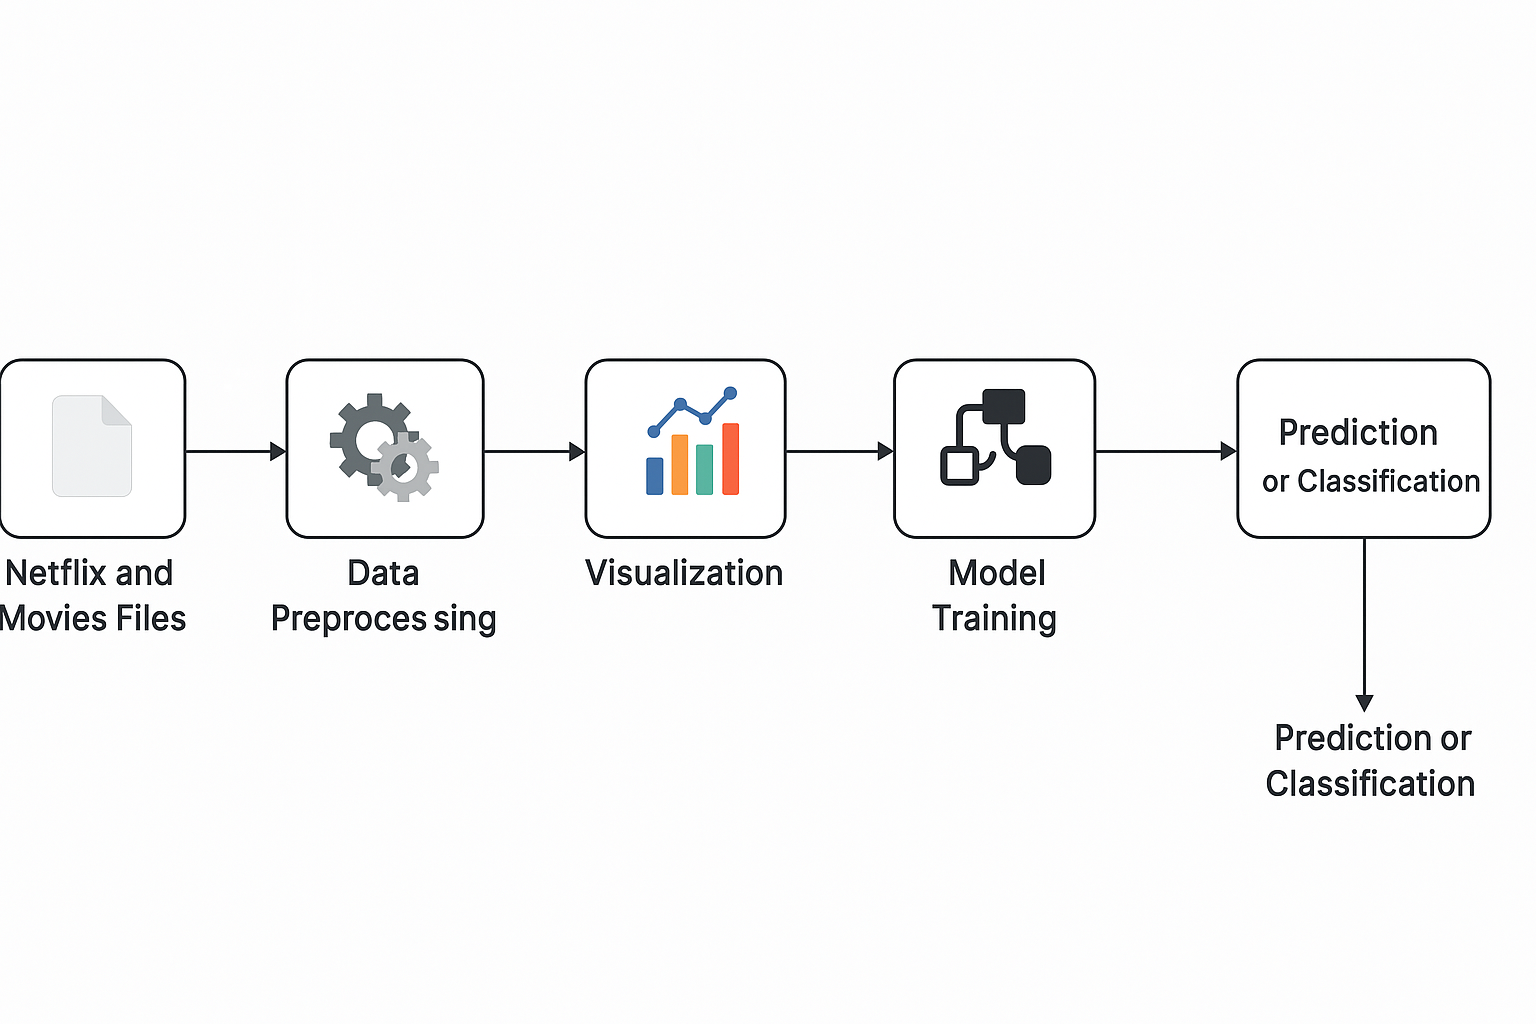

In [27]:
from IPython.display import Image, display
from google.colab import files

def upload_and_display_image():
  """Uploads an image from the user's desktop and displays it."""
  uploaded = files.upload() # Use Colab's file upload

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # Display the image directly from uploaded content
    display(Image(data=uploaded[fn]))

upload_and_display_image()

**🔁 ML Workflow Steps**

**1. 📥 Import Libraries & Load Data**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving netflix_titles.csv to netflix_titles.csv
User uploaded file "netflix_titles.csv" with length 3399671 bytes


In [16]:
# Load datasets
netflix_df = pd.read_csv('netflix_titles.csv')  # Replace with your file path

# Attempt to load 'movies_metadata.csv', if it exists
try:
    movies_df = pd.read_csv('movies_metadata.csv')  # Optional: MovieLens/Kaggle
except FileNotFoundError:
    print("Warning: 'movies_metadata.csv' not found. Skipping loading this file.")
    movies_df = None  # Or handle it differently as needed

**2. 🧹 Data Cleaning & Preprocessing**

In [17]:
# Example preprocessing
df = netflix_df.copy()

# Drop missing values for simplicity
df.dropna(subset=['type', 'title', 'release_year', 'rating'], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])

# Features and target
X = df[['release_year', 'rating_encoded']]
y = df['type_encoded']


**3. 📊 Exploratory Data Analysis (Visualizations)**

**a. Content Type Distribution**

<ipython-input-18-fe6877a1d3ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


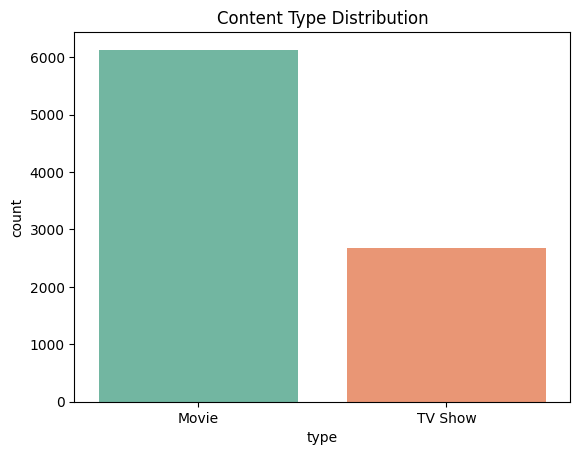

In [18]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Content Type Distribution')
plt.show()


**b. Release Year Trends**


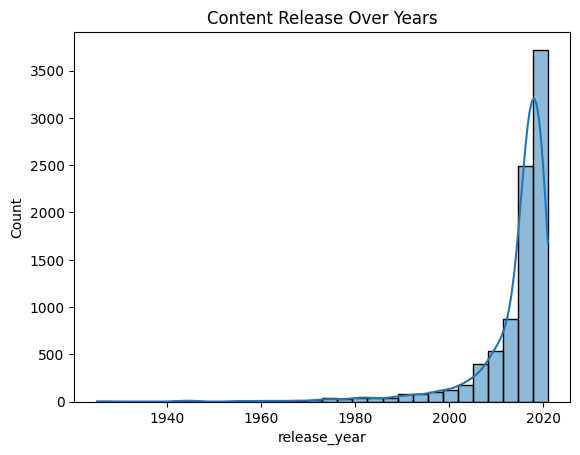

In [19]:
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Content Release Over Years')
plt.show()


**c. Rating Breakdown by Type**


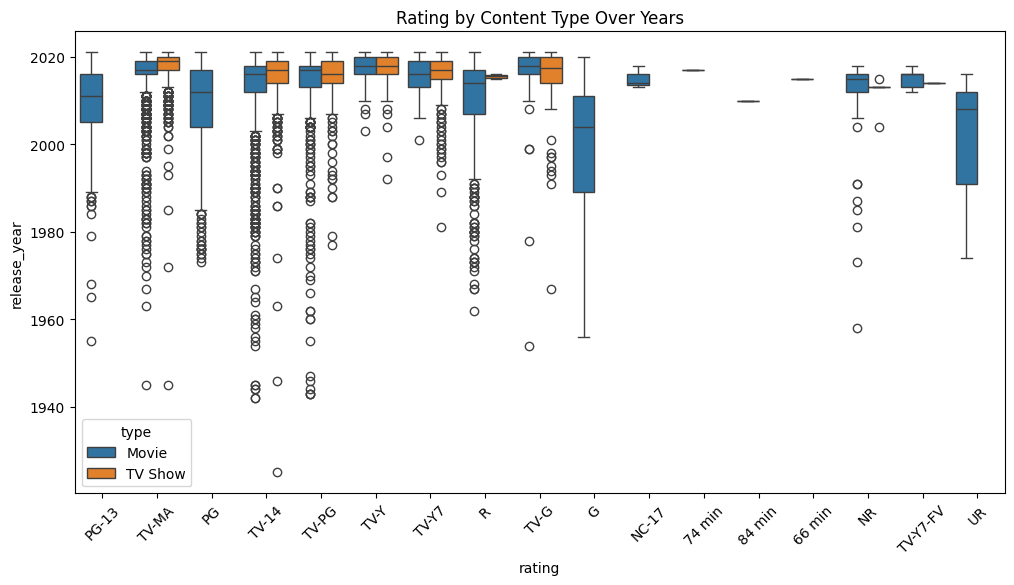

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='release_year', hue='type', data=df)
plt.xticks(rotation=45)
plt.title('Rating by Content Type Over Years')
plt.show()


**4. 🧠 Model Training**

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


**5. 📈 Model Evaluation**

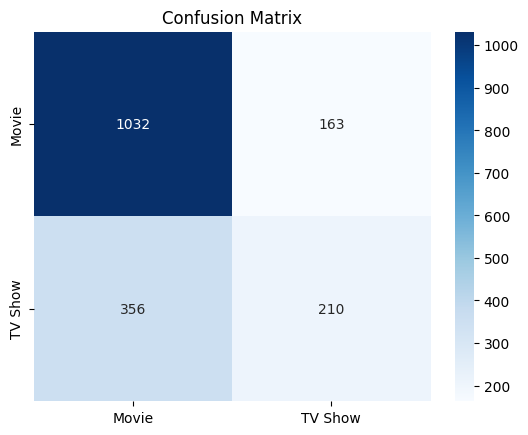

              precision    recall  f1-score   support

       Movie       0.74      0.86      0.80      1195
     TV Show       0.56      0.37      0.45       566

    accuracy                           0.71      1761
   macro avg       0.65      0.62      0.62      1761
weighted avg       0.69      0.71      0.69      1761



In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Movie', 'TV Show'],  # Explicitly set labels for 'type'
            yticklabels=['Movie', 'TV Show'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report - Provide labels for 'type' column
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

**6. 📤 Optional: Feature Importance**

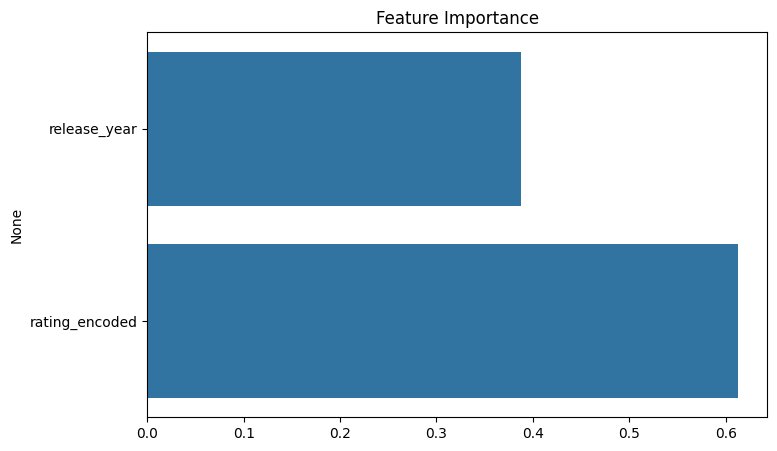

In [24]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

**Summary**

**The code performs the following steps**

**Data Loading:** Loads the Netflix Titles dataset and optionally the Movies Metadata dataset.

**Data Cleaning and Preprocessing:** Handles missing values, encodes categorical features (type, rating) using Label Encoding.

**Exploratory Data Analysis:** Creates visualizations using Seaborn and Matplotlib to analyze content distribution, release trends, and rating patterns.

**Model Training:**Trains a Random Forest Classifier to predict content type (movie or TV show) based on features (release year, rating).

**Model Evaluation:** Evaluates the model using a confusion matrix and classification report.

**Feature Importance Analysis:**Identifies the importance of different features in the model's prediction.

**Overall, this project aims to explore the Netflix content library, develop a predictive model for content type classification, and visualize interesting patterns and insights from the data. The use of Random Forest suggests an interest in understanding which features contribute most to predicting content type.**